#**Archisha Sinha**
##Course: Deep Learning
##Title: CNN with LeNet Architecture


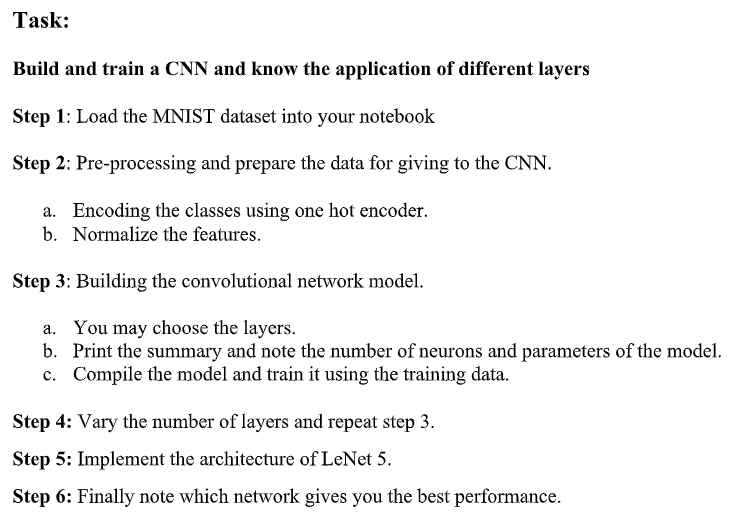

In [ ]:
from keras.datasets import imdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import models,layers,losses,metrics,regularizers

In [ ]:
(train_data, train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

In [ ]:
train_labels[0]

1

In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_data.shape

(25000,)

In [ ]:
test_data.shape

(25000,)

In [ ]:
test_labels

array([0, 1, 1, ..., 0, 0, 0])

In [ ]:
def binary_matrix(data,dimension=10000):
  matrix=np.zeros((len(data), dimension))
  for review_number, word in enumerate(data):
    matrix[review_number, word]=1
  return matrix

In [ ]:
x_train=binary_matrix(train_data)
x_test=binary_matrix(test_data)

In [ ]:
train_data[:1]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])],
      dtype=object)

In [ ]:
x_train=binary_matrix(train_data)

In [ ]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [ ]:
x_test.shape

(25000, 10000)

In [ ]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [ ]:
y_train[0]

1.0

In [ ]:
y_test.shape

(25000,)

In [ ]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [ ]:
x_val.shape

(10000, 10000)

In [ ]:
y_val

array([1., 0., 0., ..., 1., 0., 0.], dtype=float32)

In [ ]:
partial_x_train.shape

(15000, 10000)

In [ ]:
partial_y_train

array([0., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [ ]:
model=models.Sequential()
model.add(layers.Dense(32,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_val, y_val))

Epoch 1/10
469/469 [==============================] - 10s 20ms/step - loss: 0.3433 - acc: 0.8580 - val_loss: 0.2811 - val_acc: 0.8866
Epoch 2/10
469/469 [==============================] - 6s 13ms/step - loss: 0.2036 - acc: 0.9215 - val_loss: 0.3057 - val_acc: 0.8809
Epoch 3/10
469/469 [==============================] - 6s 14ms/step - loss: 0.1540 - acc: 0.9409 - val_loss: 0.3173 - val_acc: 0.8822
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1183 - acc: 0.9579 - val_loss: 0.3706 - val_acc: 0.8804
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0885 - acc: 0.9695 - val_loss: 0.4118 - val_acc: 0.8772
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0634 - acc: 0.9781 - val_loss: 0.5056 - val_acc: 0.8750
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0409 - acc: 0.9871 - val_loss: 0.5936 - val_acc: 0.8731
Epoch 8/10
469/469 [==============================] - 4s 9ms/step - los

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

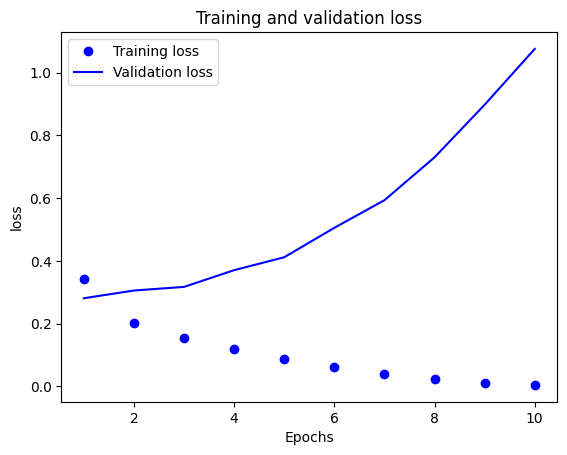

In [ ]:
# Plotting training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
epochs = range(1, len(acc)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

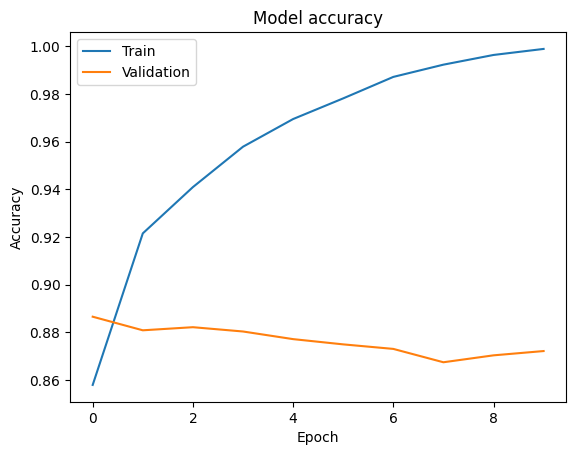

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
performance=model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 1.1783 - acc: 0.8560


In [ ]:
model.predict(x_test)

782/782 [==============================] - 3s 4ms/step


array([[1.5603120e-03],
       [1.0000000e+00],
       [9.9975646e-01],
       ...,
       [6.3715508e-04],
       [8.9459223e-05],
       [7.5283623e-01]], dtype=float32)

#Adding L2

LR 0.001

In [ ]:
model_1 = models.Sequential()
model_1.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
model_1.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001), activation='relu'))
model_1.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
model_1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history1 = model_1.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_val, y_val))

Epoch 1/10
469/469 [==============================] - 5s 8ms/step - loss: 0.3979 - acc: 0.8568 - val_loss: 0.3427 - val_acc: 0.8745
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2834 - acc: 0.9054 - val_loss: 0.3537 - val_acc: 0.8764
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2681 - acc: 0.9123 - val_loss: 0.3407 - val_acc: 0.8791
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2596 - acc: 0.9169 - val_loss: 0.3404 - val_acc: 0.8782
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2521 - acc: 0.9168 - val_loss: 0.3808 - val_acc: 0.8664
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2466 - acc: 0.9194 - val_loss: 0.3474 - val_acc: 0.8766
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2418 - acc: 0.9221 - val_loss: 0.3522 - val_acc: 0.8772
Epoch 8/10
469/469 [==============================] - 3s 7ms/step - loss: 0.

In [ ]:
history_dict1 = history1.history
history_dict1.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

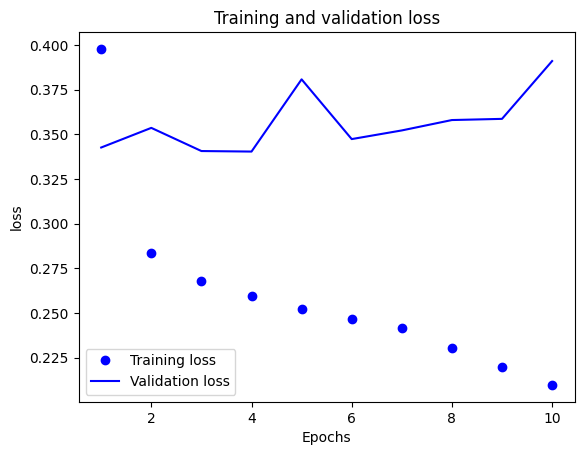

In [ ]:
# Plotting training and validation loss
import matplotlib.pyplot as plt
history_dict1 = history1.history
loss_values = history_dict1['loss']
val_loss_values = history_dict1['val_loss']
acc = history_dict1['acc']
epochs = range(1, len(acc)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

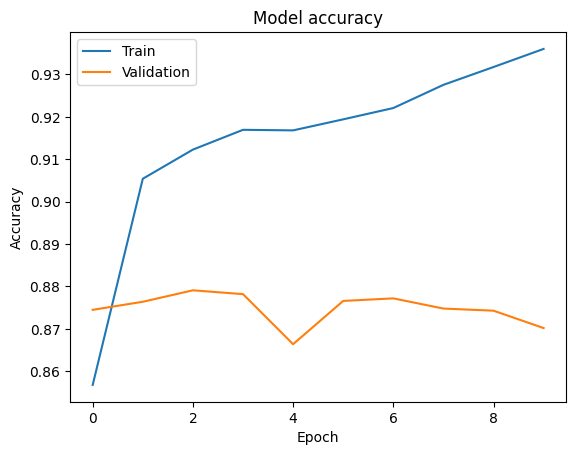

In [ ]:
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                320032    
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 320577 (1.22 MB)
Trainable params: 320577 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Step 4

In [ ]:
model0 = Sequential()
model0.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols, 1)))
model0.add(MaxPooling2D(pool_size=(2, 2)))
model0.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model0.add(MaxPooling2D(pool_size=(2, 2)))
model0.add(Flatten())
model0.add(Dense(128, activation='relu'))
model0.add(Dropout(0.5))
model0.add(Dense(num_classes, activation='softmax'))
model0.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

In [ ]:
batch_size = 128
epochs = 10

history0 = model0.fit(X_train_cnn, Y_train_cnn,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_val_cnn, Y_val_cnn))

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 0.6987 - accuracy: 0.7430 - val_loss: 0.4318 - val_accuracy: 0.8439
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.4487 - accuracy: 0.8400 - val_loss: 0.3465 - val_accuracy: 0.8735
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3900 - accuracy: 0.8594 - val_loss: 0.3096 - val_accuracy: 0.8871
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3550 - accuracy: 0.8706 - val_loss: 0.2937 - val_accuracy: 0.8923
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3266 - accuracy: 0.8810 - val_loss: 0.2777 - val_accuracy: 0.8993
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3081 - accuracy: 0.8883 - val_loss: 0.2678 - val_accuracy: 0.9020
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2952 - accuracy: 0.8919 - val_loss: 0.2601 - val_accuracy: 0.9064
Epoch 

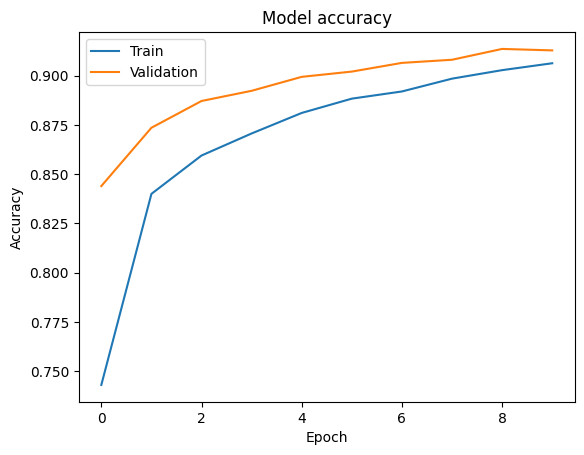

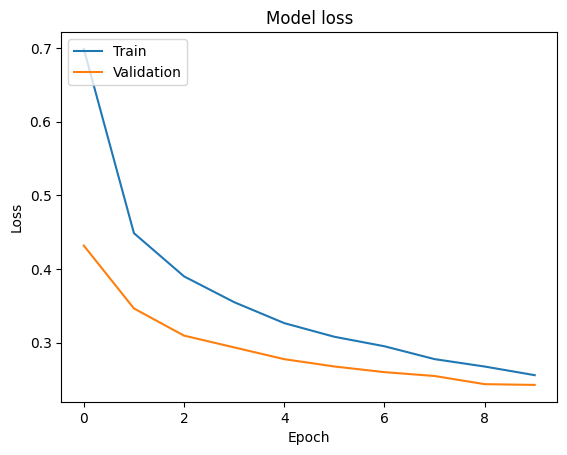

In [ ]:
# Plot training & validation accuracy values
plt.plot(history0.history['accuracy'])
plt.plot(history0.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history0.history['loss'])
plt.plot(history0.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model0.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

#LeNet Architecture

In [ ]:
from keras.layers import AveragePooling2D

In [ ]:
model1 = Sequential()
model1.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model1.add(AveragePooling2D(pool_size=(2, 2)))
model1.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model1.add(AveragePooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(120, activation='relu'))
model1.add(Dense(84, activation='relu'))
model1.add(Dense(10, activation='softmax'))
model1.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 12, 12, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_3 (Flatten)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 120)              

In [ ]:
batch_size = 128
epochs = 10

history1 = model1.fit(X_train_cnn, Y_train_cnn,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_val_cnn, Y_val_cnn))

Epoch 1/10
375/375 [==============================] - 5s 5ms/step - loss: 0.7171 - accuracy: 0.7311 - val_loss: 0.5071 - val_accuracy: 0.8131
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 0.4606 - accuracy: 0.8301 - val_loss: 0.4197 - val_accuracy: 0.8518
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3952 - accuracy: 0.8565 - val_loss: 0.3736 - val_accuracy: 0.8675
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3596 - accuracy: 0.8687 - val_loss: 0.3573 - val_accuracy: 0.8710
Epoch 5/10
375/375 [==============================] - 3s 7ms/step - loss: 0.3350 - accuracy: 0.8785 - val_loss: 0.3228 - val_accuracy: 0.8842
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3174 - accuracy: 0.8840 - val_loss: 0.3350 - val_accuracy: 0.8805
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2987 - accuracy: 0.8916 - val_loss: 0.3144 - val_accuracy: 0.8862
Epoch 

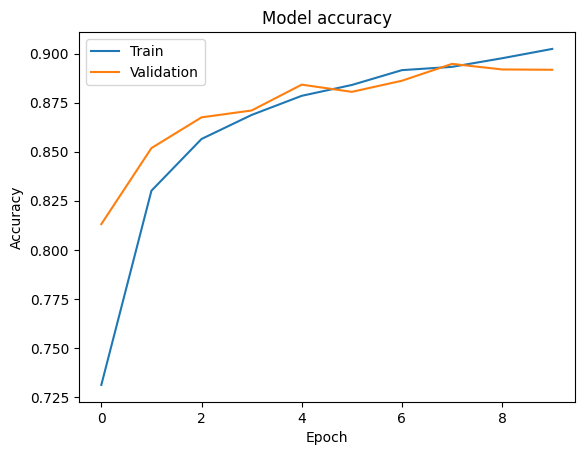

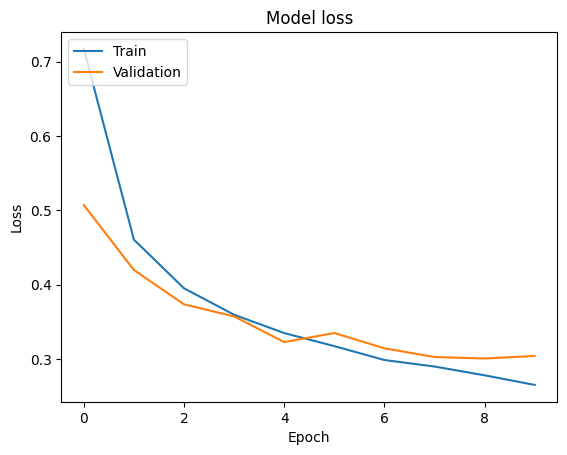

In [ ]:
# Plot training & validation accuracy values
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#Conclusion:

The architecture in step 4 implemented here works better than Lenet and the Simple CNN in Step 3. This is because the model in step 4 has the highest validation accuracy and the lowest validation loss. Also Lenet uses average pooling and the architecture in step 4 uses max pooling.